# Create grid_V file

In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
import matplotlib.cm as cm
from matplotlib import animation
from numpy import *
from pylab import *
%matplotlib inline

In [2]:
## for grid_V
plume_33v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0033.nc')
plume_34v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0034.nc')
plume_35v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0035.nc')
plume_39v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0039.nc')
plume_40v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0040.nc')
plume_41v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0041.nc')
plume_45v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0045.nc')
plume_46v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0046.nc')
plume_47v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0047.nc')
plume_51v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0051.nc')
plume_52v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0052.nc')
plume_53v = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_Plume_V_0053.nc')

In [3]:
nc_tools.show_variables(plume_33v)

[u'nav_lon', u'nav_lat', u'depthv', u'time_counter', u'time_counter_bnds', u'vomecrty', u'v_wind_stress']


In [5]:
depths = plume_33v.variables['depthv']
time = plume_33v.variables['time_counter']
time_counterbnds = plume_33v.variables['time_counter_bnds']

In [6]:
## for longitude 
lon33v= plume_33v.variables['nav_lon']
lon34v= plume_34v.variables['nav_lon']
lon35v= plume_35v.variables['nav_lon']
lon39v= plume_39v.variables['nav_lon']
lon40v= plume_40v.variables['nav_lon']
lon41v= plume_41v.variables['nav_lon']
lon45v= plume_45v.variables['nav_lon']
lon46v= plume_46v.variables['nav_lon']
lon47v= plume_47v.variables['nav_lon']
lon51v= plume_51v.variables['nav_lon']
lon52v= plume_52v.variables['nav_lon']
lon53v= plume_53v.variables['nav_lon']

In [7]:
## for latitude
lat33v= plume_33v.variables['nav_lat']
lat34v= plume_34v.variables['nav_lat']
lat35v= plume_35v.variables['nav_lat']
lat39v= plume_39v.variables['nav_lat']
lat40v= plume_40v.variables['nav_lat']
lat41v= plume_41v.variables['nav_lat']
lat45v= plume_45v.variables['nav_lat']
lat46v= plume_46v.variables['nav_lat']
lat47v= plume_47v.variables['nav_lat']
lat51v= plume_51v.variables['nav_lat']
lat52v= plume_52v.variables['nav_lat']
lat53v= plume_53v.variables['nav_lat']

In [8]:
## for v velocity
v33 = plume_33v.variables['vomecrty']
v34 = plume_34v.variables['vomecrty']
v35 = plume_35v.variables['vomecrty']
v39 = plume_39v.variables['vomecrty']
v40 = plume_40v.variables['vomecrty']
v41 = plume_41v.variables['vomecrty']
v45 = plume_45v.variables['vomecrty']
v46 = plume_46v.variables['vomecrty']
v47 = plume_47v.variables['vomecrty']
v51 = plume_51v.variables['vomecrty']
v52 = plume_52v.variables['vomecrty']
v53 = plume_53v.variables['vomecrty']

In [9]:
## try to combine longitude and latitude in grid_V
lonv = np.zeros([170, 138])
latv = np.zeros([170, 138])
## This is the edge for lon:
lonv[0:36, 0:6] = lon33v[:,:]
lonv[36:100, 0:6] = lon39v[:,:]
lonv[100:164, 0:6] = lon45v[:,:]
lonv[164:170, 0:6] = lon51v[:,:]
## This is the edge for lat:
latv[0:36, 0:6] = lat33v[:,:]
latv[36:100, 0:6] = lat39v[:,:]
latv[100:164, 0:6] = lat45v[:,:]
latv[164:170, 0:6] = lat51v[:,:]

In [10]:
## try to combine V velocity in grid_V
v = np.zeros([336, 40, 170, 138])
## This is the edge for v:
v[:,:, 0:36, 0:6] =v33[:,:,:,:]
v[:,:, 36:100, 0:6] = v39[:,:,:,:]
v[:,:, 100:164, 0:6 ] =v45[:,:,:,:]
v[:,:, 164:170, 0:6] = v51[:,:,:,:]

In [13]:
## v & lon & lat combination
for j in np.arange(36):
    for i in np.arange(66):
        v[:,:,j, 6+i] = v34[:,:,j,i]
        lonv[j, 6+i] = lon34v[j,i]
        latv[j, 6+i] = lat34v[j,i]
    print (j)
        
for j in np.arange(36):
    for i in np.arange(66):
        v[:,:,j,72+i] = v35[:,:,j,i]
        lonv[j, 72+i] = lon35v[j,i]
        latv[j, 72+i] = lat35v[j,i]
    print (j)
    
for j in np.arange(64):
    for i in np.arange(66):
        v[:,:, 36+j, 6+i] = v40[:,:,j,i]
        lonv[36+j, 6+i] = lon40v[j,i]
        latv[36+j, 6+i] = lat40v[j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        v[:,:, 36+j, 72+i] = v41[:,:,j,i]
        lonv[36+j, 72+i] = lon41v[j,i]
        latv[36+j, 72+i] = lat41v[j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        v[:,:,100 +j, 6+i] = v46[:,:,j,i]
        lonv[100+j, 6+i] = lon46v[j,i]
        latv[100+j, 6+i] = lat46v[j,i]
    print (j) 
    
for j in np.arange(64):
    for i in np.arange(66):
        v[:,:,100 +j, 72+i] = v47[:,:,j,i]
        lonv[100+j, 72+i] = lon47v[j,i]
        latv[100+j, 72+i] = lat47v[j,i]
    print (j)
    
for j in np.arange(6):
    for i in np.arange(66):
        v[:,:,164 +j, 6+i] = v52[:,:,j,i]
        lonv[164+j, 6+i] = lon52v[j,i]
        latv[164+j, 6+i] = lat52v[j,i]
    print (j) 
    
for j in np.arange(6):
    for i in np.arange(66):
        v[:,:,164 +j, 72+i] = v53[:,:,j,i]
        lonv[164+j, 72+i] = lon53v[j,i]
        latv[164+j, 72+i] = lat53v[j,i]
    print (j)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
0
1
2
3
4
5


<matplotlib.colorbar.Colorbar instance at 0x7f505c861758>

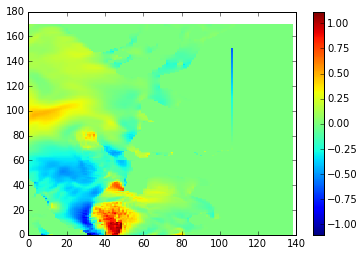

In [14]:
## v plot
plt.pcolormesh(v[0,0, :,:])
plt.colorbar()

In [15]:
# build grid_V nc file
grid_V = nc.Dataset('1hplume06160629gridV.nc', 'w')
#nc_tools.init_dataset_attrs(
    #grid_V, 
    #title='Salinity Temperature Initial Conditions based on Nowcast June 14, 2015 for extended Fraser river channel', 
    #notebook_name='Explore1h_plumeFileStructure', 
    #nc_filepath='/data/jieliu/MEOPAR/river-treatment/14nor_NW/1h_plume_06160629_grid_T.nc')
    #comment='Combined grid_T file with extended Fraser bathymetry from June 16, to 29')
grid_V.createDimension('y', 170)
grid_V.createDimension('x', 138)
grid_V.createDimension('depthv',size = len(depths))
grid_V.createDimension('time_counter', size = len(time))
grid_V.createDimension('tbnds', size = 2)
nc_tools.show_dimensions(grid_V)
# show variables
nav_lat = grid_V.createVariable('nav_lat', 'float32', ('y','x'))
nav_lat.long_name = 'Latitude'
nav_lat.units = 'degrees_north'
nav_lat[:] = latv
nav_lon = grid_V.createVariable('nav_lon', 'float32', ('y','x'))
nav_lon.long_name = 'Longitude'
nav_lon.units = 'degrees_east'
nav_lon[:] = lonv
depthv = grid_V.createVariable('depthv', 'float32', ('depthv'), zlib=True)
#depths = foo.createVariable('Bathymetry', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

depthv.long_name = 'Depth'
depthv.coordinates = 'depthV'
depthv.units = 'm'
depthv.positive = 'down'
depthv.valid_range = np.array((4., 428.))##minimum depth 4m
depthv[:] = depths

time_counter = grid_V.createVariable('time_counter', 'float64', ('time_counter'))
time_counter.units = 'seconds since 2015-06-15 0:00:00'
time_counter.long_name = 'Time axis'
time_counter.time_origin = ' 2015-JUN-15 00:00:00'
#time.coordinates = 'time_counter'
time_counter[:] = time

time_counter_bnds = grid_V.createVariable('time_counter_bnds', 'float64', 
                                          ('time_counter', 'tbnds'))
#time_counter.units = 'seconds since 2015-06-16 0:00:00'
#time_counter.long_name = 'Time axis'
#time.coordinates = 'time_counter'
time_counter_bnds[:] = time_counterbnds

vomecrty = grid_V.createVariable('vomecrty', 'float32', 
                               ('time_counter','depthv','y','x'))
vomecrty.units = 'm/s'
vomecrty.long_name = 'ocean current along j-axis'  
vomecrty.coordinates = 'nav_lon nav_lat depthv time_counter'
vomecrty.grid = 'SalishSea6, extended and deepen Fraser'
vomecrty[:] = v

grid_V.history = """[2015-06-16] Created"""

<type 'netCDF4.Dimension'>: name = 'y', size = 170

<type 'netCDF4.Dimension'>: name = 'x', size = 138

<type 'netCDF4.Dimension'>: name = 'depthv', size = 40

<type 'netCDF4.Dimension'>: name = 'time_counter', size = 336

<type 'netCDF4.Dimension'>: name = 'tbnds', size = 2



In [16]:
grid_V.close()

In [17]:
a= nc.Dataset('1hplume06160629gridV.nc')
nc_tools.show_variables(a)

[u'nav_lat', u'nav_lon', u'depthv', u'time_counter', u'time_counter_bnds', u'vomecrty']


In [18]:
llat = a.variables['nav_lat']
llat[30,23]

48.896042

In [20]:
ddept = a.variables['depthv']
ddept[4]

4.5000706

In [21]:
tc = a.variables['time_counter']
tc[3]

99000.0

In [22]:
vvv = a.variables['vomecrty']
vvv[3,4,5,6]

-0.23674546